<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/4_explore_and_merge_RAP_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast

In [38]:

# contains_raap = sample_df["גוף המסמך"].str.contains('רע"פ', na=False)

# # ספירה של כמה מסמכים מכילים את המילה רע"פ וכמה לא
# count_yes = contains_raap.sum()
# count_no = len(contains_raap) - count_yes

# # הדפסת הספירה
# print(f"מספר המסמכים שמכילים את המילה 'רע\"פ': {count_yes}")
# print(f"מספר המסמכים שלא מכילים את המילה 'רע\"פ': {count_no}")

# # סינון הדאטה לשמירת רק המסמכים שכן מכילות את המילה
# sample_df = sample_df[contains_raap]

# # שמירה לקובץ חדש אם יש צורך
# output_file = "filtered_sample_with_raap.csv"
# sample_df.to_csv(output_file, index=False, encoding="utf-8")
# print(f"הדאטה המסונן נשמר לקובץ: '{output_file}'")


In [39]:
full_final_df = pd.read_csv('full_final_df_cleaned.csv' )

In [40]:
full_final_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,Justice name 5,"מס סידורי של הפס""ד הממופים",מי ערער על החלטת המחוזי (ביחס למעמדו במחוזי),שם השופט הראשון במותב,"חודש קבלת פס""ד הנבחן",Justice 4’s activity,"יום קבלת פס""ד הנבחן",Justice 5’s activity,"שנת קבלת פס""ד הנבחן",Justice name 4
0,9917/02,12,"ע""פ 9917/02 אכרמ זהרה נ. מדינת ישראל",2002,"ע""פ 9917/02","ע""פ",ערעור פלילי,0.0,2007-09-25,1635,...,NaN,27.0,Defendant,Edmond Levy,May,NaN,17.0,NaN,2007.0,NaN
1,845/02,9,"ע""פ 845/02 מדינת ישראל נ. תנובה מרכז שיתופי לש...",2002,"ע""פ 845/02","ע""פ",ערעור פלילי,0.0,2008-01-09,2082,...,NaN,75.0,Plaintiff,Dorit Beinisch,October,NaN,10.0,NaN,2007.0,NaN
2,4379/02,2,"ע""פ 4379/02",2002,"ע""פ 4379/02","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,Missing,18.0,Defendant,Misha'el Kheshin,January,Missing,18,Missing,2006.0,Missing
3,9059/03,6,"ע""פ 9059/03 אהרונ יוסבשוילי נ. מדינת ישראל",2003,"ע""פ 9059/03","ע""פ",ערעור פלילי,0.0,2007-03-25,1260,...,NaN,40.0,Defendant,Dorit Beinisch,March,NaN,21.0,NaN,2007.0,NaN
4,7075/03,24,"ע""פ 7075/03 אסתר אלונ נ. מדינת ישראל",2003,"ע""פ 7075/03","ע""פ",ערעור פלילי,0.0,2008-07-15,1095,...,Missing,26.0,Defendant,Edmond Levy,August,Missing,2,Missing,2006.0,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,4180/07,4,"רע""פ 4180/07 גאוי גאוי נ. מדינת ישראל",2007,"רע""פ 4180/07","רע""פ",רשות ערעור פלילי,0.0,2007-07-16,63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,8880/07,1,"רע""פ 8880/07 יעקב קרקו נ. מדינת ישראל",2007,"רע""פ 8880/07","רע""פ",רשות ערעור פלילי,0.0,2007-10-28,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1749,5570/01,6,"ע""פ 5570/01 אסתר מיכאלי נ. מדינת ישראל",2001,"ע""פ 5570/01","ע""פ",ערעור פלילי,0.0,2007-03-01,2034,...,NaN,47.0,Defendant,Elyakim Rubinstein,February,NaN,5.0,NaN,2007.0,NaN
1750,7450/01,16,"ע""פ 7450/01 אשרפ אבו-ליטאפ נ. מדינת ישראל",2001,"ע""פ 7450/01","ע""פ",ערעור פלילי,0.0,2007-07-31,2136,...,NaN,1.0,Defendant,Dvora Berliner,July,NaN,31.0,NaN,2007.0,NaN


In [41]:
full_final_df['dca'].unique()

array([0, 1])

In [42]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['dca'].unique()

array([0])

In [43]:
full_final_df[full_final_df['סוג הליך']=='ע"פ']['Outcome of case'].unique()

array(['O R', 'O A', 'O RETURN TO COURT',
       'O Approved in part + Denied in part', 'O COMPROMISE VERDICT',
       'O R RETURN TO COURT', 'O WITHDRAWAL',
       'O approved in part + denied in part', 'O R COMPROMISE VERDICT',
       'O V', 'O R A', 'O A WITHDRAWAL'], dtype=object)

In [44]:
full_final_df[full_final_df['סוג הליך']=='רע"פ']['Outcome of case'].unique()

array(['G R',
       "G A Granted with the state's consent. The appeal itself was denied",
       'G A',
       'G R substential matter that was resolved with no consequences on the defendant (as the state consented)',
       'G V (vacated in part)', 'D A', 'D', 'O A',
       "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.",
       "D RETURN TO COURT Erased due to the fact that the procedure in the Magistrates Court wasn't finished",
       'Crim + Sent A G', 'G', 'G RETURN TO COURT',
       "G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.",
       "G R partially, with appellee's consent", 'Crim + Sent A D',
       'Crim + Sub D A', 'Crim + Ev A D', 'Crim + Sub D',
       'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court',
       'O V denied in part, merged with another procedure in 

In [ ]:
######################################### עצרתי פה~!!!!

# Outcome of case drop null

In [45]:
full_final_df = full_final_df[["גוף המסמך","מספר תיק",'Outcome of case']].dropna(how='any', ignore_index=True)
full_final_df

,גוף המסמך,מספר תיק,Outcome of case
0,"['פסק דין בתיק ע""פ 9917/02 בבית המשפט העליון ב...",9917/02,O R
1,"['פסק-דין בתיק ע""פ 845/02 בבית המשפט העליון בש...",845/02,O R
2,"['פסק-דין בתיק ע""פ 4379/02 בבית המשפט העליון ב...",4379/02,O A
3,"['פסק דין בתיק ע""פ 9059/03 בבית המשפט העליון ב...",9059/03,O A
4,"['פסק-דין בתיק ע""פ 7075/03 בבית המשפט העליון ב...",7075/03,O A
...,...,...,...
1738,"['החלטה בתיק רע""פ 4180/07 בבית המשפט העליון רע...",4180/07,D A
1739,"['החלטה בתיק רע""פ 8880/07 בבית המשפט העליון רע...",8880/07,D A
1740,"['פסק דין בתיק ע""פ 5570/01 בבית המשפט העליון ב...",5570/01,O R RETURN TO COURT
1741,"['פסק דין בתיק ע""פ 7450/01 בבית המשפט העליון ב...",7450/01,O A


In [46]:
approved_cases = set()  # ערכים שסווגו כ-1
denied_cases = set()    # ערכים שסווגו כ-0
other_cases = set()     # ערכים שסווגו כ-2
discarded_cases = set() # ערכים שסווגו כלא רלוונטיים (D)

def binary_outcome(outcome):
    if 'O' in outcome:  # שלב ראשון - בדיקה אם יש 'O'
        if 'A' in outcome:
            approved_cases.add(outcome)
            return 1  # התקבל
        elif 'R' in outcome:
            denied_cases.add(outcome)
            return 0  # נדחה
        else:
            other_cases.add(outcome)
            return 2  # לא עונה על הקריטריונים
    elif 'G' in outcome:  # שלב שני - אם אין 'O' אבל יש 'G'
        if 'A' in outcome:
            approved_cases.add(outcome)
            return 1  # התקבל
        elif 'R' in outcome:
            denied_cases.add(outcome)
            return 0  # נדחה
        else:
            other_cases.add(outcome)
            return 2  # לא עונה על הקריטריונים
    else:
        discarded_cases.add(outcome)
        return None  # לא רלוונטי

# הפעלת הפונקציה על העמודה הרלוונטית
full_final_df['numeric_outcome'] = full_final_df['Outcome of case'].apply(binary_outcome)

# הדפסת תוצאות
print("תיקים שסווגו כ-1 (התקבלו):")
print(approved_cases)
print(f"סה\"כ: {len(approved_cases)}\n")

print("תיקים שסווגו כ-0 (נדחו):")
print(denied_cases)
print(f"סה\"כ: {len(denied_cases)}\n")

print("תיקים שסווגו כ-2 (אחרים):")
print(other_cases)
print(f"סה\"כ: {len(other_cases)}\n")

print("תיקים שסווגו כלא רלוונטיים (D):")
print(discarded_cases)
print(f"סה\"כ: {len(discarded_cases)}\n")

# הדפסת כמה מכל קטגוריה יש בעמודה החדשה
print("התפלגות ב-'numeric_outcome':")
print(full_final_df['numeric_outcome'].value_counts(dropna=False))


תיקים שסווגו כ-1 (התקבלו):
{"G WITHDRAWAL V Appellant was aquitted of one felony with appellee's consent. The rest of the appeal was withdrawaled.", 'G R A the appellant was acquitted of some felonies but the punishment remained the same.', 'O A', 'O A WITHDRAWAL', "G A with apellee's consent", 'O R A', 'O Approved in part + Denied in part', 'Crim + Sent A G', 'G A', "G A Granted with the state's consent, the appeal itself was rejected", "G A at most- defendant was acquitted of one felony with plaintiff's consent. The sunction remained.", 'O WITHDRAWAL', 'G A Denied at most'}
סה"כ: 13

תיקים שסווגו כ-0 (נדחו):
{"G R with the state's consent", "G V RETURN TO COURT with appellee's consent", 'G R RETURN TO COURT', 'G R', "G R partially and with the state's consent", 'O COMPROMISE VERDICT', 'G RETURN TO COURT', 'D RETURN TO COURT denied but with option for the defendant to submitt an appeal again after the final verdict of the district court', 'O R', "D RETURN TO COURT Erased due to the fa

In [47]:
# ספירת הערכים בכל קטגוריה בעמודת Outcome of case
outcome_counts = full_final_df['Outcome of case'].value_counts()
print("\nהתפלגות ב-'Outcome of case':")
print(outcome_counts)

# ספירת הערכים לאחר המיפוי ל-numeric_outcome
numeric_counts = full_final_df['numeric_outcome'].value_counts(dropna=False)
print("\nהתפלגות בעמודת 'numeric_outcome':")
print(numeric_counts)

# בדיקה של ערכים שלא קיבלו numeric_outcome
missing_outcome = full_final_df[full_final_df['numeric_outcome'].isna()]
print("\nשורות שלא קיבלו ערך בעמודת 'numeric_outcome':")
print(missing_outcome[['Outcome of case']].value_counts())



התפלגות ב-'Outcome of case':
Outcome of case
O A                                                                                                                                              744
D A                                                                                                                                              505
O R                                                                                                                                              217
D                                                                                                                                                109
G A                                                                                                                                               18
Crim + Sent A D                                                                                                                                   18
O Approved in part + Denied in part                         

In [49]:
full_final_df['numeric_outcome'].dropna(inplace=True)

In [51]:
pd.set_option('display.max_colwidth', None)

approved_documents = full_final_df[full_final_df['numeric_outcome'] == 1][['גוף המסמך', 'Outcome of case']].tail(30)
# denied_documents = full_final_df[full_final_df['numeric_outcome'] == 0][['גוף המסמך', 'Outcome of case']].tail(15)

# הדפסת המסמכים שאושרו (כוללים G)
print("\nמסמכי G שסווגו כאושרו (כוללים G):")
for idx, row in approved_documents.iterrows():
    print(f"\nמסמך {idx + 1} שאושר:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")

# # הדפסת המסמכים שנדחו (כוללים D)
# print("\nמסמכים D שסווגו כנדחו (כוללים D):")
# for idx, row in denied_documents.iterrows():
#     print(f"\nמסמך {idx + 1} שנדחה:\nOutcome of case: {row['Outcome of case']}\n\n{row['גוף המסמך']}\n\n")



מסמכי G שסווגו כאושרו (כוללים G):

מסמך 1407 שאושר:
Outcome of case: O A

['פסק דין בתיק ע"פ 1995/07 בבית המשפט העליון בשבתו כבית משפט לערעורים פליליים ע"פ 1995/07 בפני: כבוד השופט א\' גרוניס כבוד השופטת א\' חיות כבוד השופט י\' אלון המערער: כפיר בצלאל נגד המשיבה: מדינת ישראל ערעור על פסק דינו של בית המשפט המחוזי בבאר שבע בת"פ 8322/05 מיום 21.1.07 שניתן ע"י כב\' השופטת ר\' ברקאי תאריך הישיבה: כ\' בחשון התשס"ח (1.1.07) בשם המערער: עו"ד מ\' סרוגוביץ בשם המשיבה: בשם קצינת המבחן: עו"ד ע\' אופק גב\' א\' פרויד פסק דין 1. המערער הודה בעובדותיו של כתב אישום והורשע בעקבות זאת בעבירות של חבלה חמורה בנסיבות מחמירות ובדרישת נכס באיומים. בית המשפט המחוזי בבאר שבע השית עליו שישה חודשי מאסר על-תנאי, העמידו במבחן למשך שנה אחת וחייבו לבצע שירות לתועלת הציבור במשך 300 שעות. בערעור מבקש המערער כי תבוטל הרשעתו, וזאת לאחר שבית משפט קמא סרב לבקשה. 2. דעתנו היא כי דינו של הערעור להידחות. כידוע, הכלל הוא כי מקום שנמצא שאדם ביצע עבירה פלילית יש להרשיעו. אכן, קיימים חריגים לכלל, אך המקרה דנא אינו נמנה עליהם. המ

In [52]:
full_final_df = full_final_df[full_final_df["numeric_outcome"]!=None]

In [53]:
full_final_df.shape

(1743, 4)

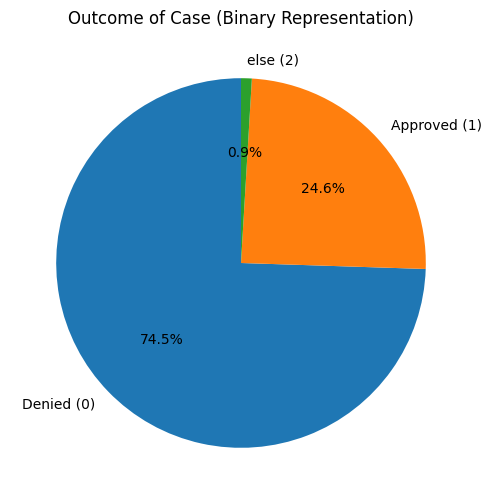

In [57]:
# ספירת הערכים הבינאריים בעמודת binary_outcome
numeric_outcome = full_final_df['numeric_outcome'].value_counts()

labels = ['Denied (0)','Approved (1)','else (2)']

plt.figure(figsize=(6, 6))
plt.pie(numeric_outcome, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Outcome of Case (Binary Representation)')

plt.show()

In [58]:
numeric_outcome

,count
numeric_outcome,
1.0,794
0.0,262
2.0,10


In [59]:
file_path = 'full_final_df.csv'  # נתיב לשמירה
full_final_df.to_csv(file_path, index=False, encoding='utf-8')

print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")

הקובץ נשמר בהצלחה בנתיב: full_final_df.csv


###

In [60]:
full_final_df.head()

גוף המסמך  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  